In [1]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D 

In [2]:
def get_data(path):
    df = pd.read_excel(path,header=None)
    col = list(df.columns)
    mu = df.mean(axis=0)
    std = df.std(axis=0)
    df = (df-mu)/std
    df['ones']=1
    cols_x = ['ones',0,1]
    cols_y = [2]
    X=df[cols_x].values
    Y=df[cols_y].values
    return X,Y

In [3]:
path = r"C:\Users\gprak\Downloads\BITS Courses\CS F464 Machine Learning I\data\data.xlsx"
X,Y = get_data(path)

## Running SGD on ridge regression version of linear regression

In [4]:
def run_SGD_linear_regression(X,Y,learning_rate = 0.001,lambda1 = 0.4,iterations = 1000,sgd_iters = 100):
    N,D = X.shape
    X_new=X.copy()
    Y_new=Y.copy()
    costs = []
    overall_costs=[]
    W = np.random.randn(D)/np.sqrt(D)
    W = np.array([W]).T
    W0=W.copy()
    xx,yy,zz=[],[],[]

    cost_for_plots = []
    for i in range(sgd_iters):
        tmpX,tmpY = shuffle(X_new,Y_new)
        costs=[]
        for n in range(N):
            # Step 1: Made predictions
            x = tmpX[n,:].reshape(1,D)
            y = tmpY[n,:].reshape(1,1)

            Yhat = x.dot(W)
            delta = Yhat-y
            # Step 2: Apply convergence rule
            W = W*(1-learning_rate*lambda1) - learning_rate*x.T.dot(delta)

            mse = np.multiply(delta,delta).sum()/N
#             mse = delta.dot(delta) / N
        
            mse += 0.5*lambda1*np.multiply(W,W).sum()
#             print(mse)
#             break
            xx.append(W[1])
            yy.append(W[2])
            cost_for_plots.append(mse)
            costs.append(mse)
        overall_costs.append(costs)
    zz=cost_for_plots
    return (xx,yy,zz)

In [5]:
xx,yy,zz = run_SGD_linear_regression(X,Y)

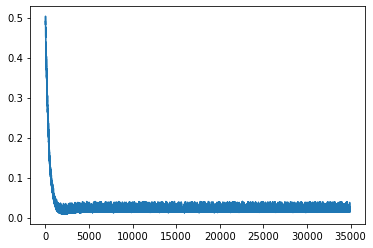

In [6]:
plt.plot(zz)
plt.show()

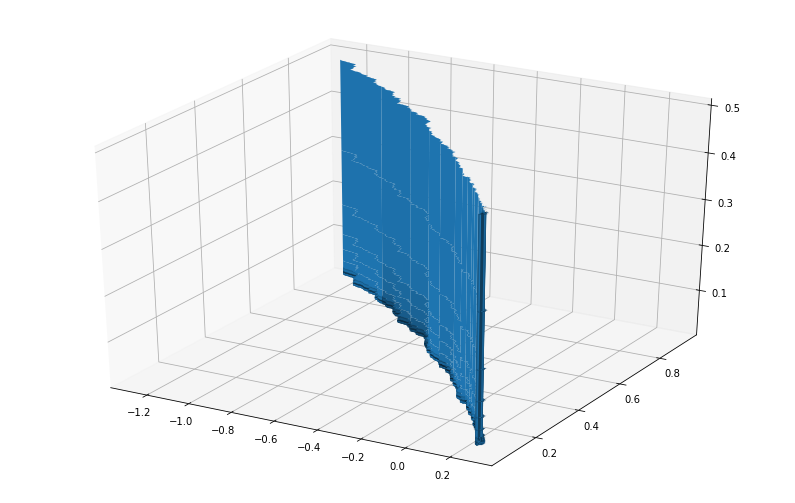

In [7]:
# xx,yy=w1,w2
xxx,yyy,zzz=np.array(yy[:10000]),np.array(xx[:10000]),np.array([zz[:10000]])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(xxx, yyy, zzz)

## Running BGD on ridge regression version of linear regression

In [8]:
def run_BGD_linear_regression(X,Y,learning_rate = 0.001,lambda1 = 0.4,iterations = 1000,batch_size = 100):
    N,D = X.shape
    
    n_batches = int(np.ceil(N/batch_size))
    print(f"Dividing into number of batches = {n_batches}")
    X_new=X.copy()
    Y_new=Y.copy()
    costs = []
    overall_costs=[]
    W = np.random.randn(D)/np.sqrt(D)
    W = np.array([W]).T
    W0=W.copy()
    xx,yy,zz=[],[],[]

    cost_for_plots = []
    for i in range(iterations):
        tmpX,tmpY = shuffle(X,Y)
        for j in range(n_batches):
            x = tmpX[j*batch_size:(j+1)*batch_size,:]
            y = tmpY[j*batch_size:(j+1)*batch_size,:]
            Yhat = x.dot(W)
            delta = Yhat-y
            # Step 2: Apply convergence rule
            W = W*(1-learning_rate*lambda1) - learning_rate*x.T.dot(delta)

            mse = np.multiply(delta,delta).sum()/N
        
            mse += 0.5*lambda1*np.multiply(W,W).sum()
            xx.append(W[1])
            yy.append(W[2])
            cost_for_plots.append(mse)
            costs.append(mse)
        overall_costs.append(costs)
    zz=cost_for_plots
    return (xx,yy,zz)

In [9]:
xx,yy,zz = run_BGD_linear_regression(X,Y)

Dividing into number of batches = 4


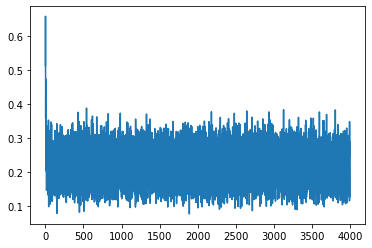

In [10]:
plt.plot(zz)
plt.show()

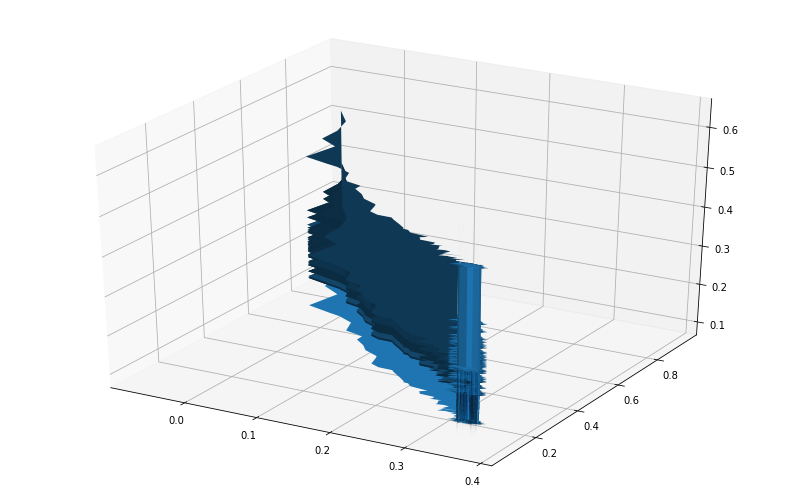

In [11]:
# xx,yy=w1,w2
xxx,yyy,zzz=np.array(yy[:50000]),np.array(xx[:50000]),np.array([zz[:50000]])
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(xxx, yyy, zzz)